# PERSISTENT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("medcap_rev.xlsx")
df

,COMPANY,DATE,REVENUE (in Cr),Revenue growth rate
0,Persistent systems,2024-04-01,9879.38,14.478764
1,Persistent systems,2023-04-01,8629.88,35.248042
2,Persistent systems,2022-04-01,6380.78,35.335689
3,Persistent systems,2021-04-01,4714.78,12.749004
4,Persistent systems,2020-04-01,4181.66,4.365904
5,Persistent systems,2019-04-01,4006.73,2.123142
6,Persistent systems,2018-04-01,3923.43,9.790210
7,Persistent systems,2017-04-01,3573.57,21.875000
8,Persistent systems,2016-04-01,2932.16,13.915858
9,Persistent systems,2015-04-01,2573.97,12.773723


In [6]:
per_rev = df[df["COMPANY"]=="Persistent systems"]
per_rev = per_rev.copy()
per_rev["Index"] =np.flip( np.arange(0,11))
per_rev

,COMPANY,DATE,REVENUE (in Cr),Revenue growth rate,Index
0,Persistent systems,2024-04-01,9879.38,14.478764,10
1,Persistent systems,2023-04-01,8629.88,35.248042,9
2,Persistent systems,2022-04-01,6380.78,35.335689,8
3,Persistent systems,2021-04-01,4714.78,12.749004,7
4,Persistent systems,2020-04-01,4181.66,4.365904,6
5,Persistent systems,2019-04-01,4006.73,2.123142,5
6,Persistent systems,2018-04-01,3923.43,9.790210,4
7,Persistent systems,2017-04-01,3573.57,21.875000,3
8,Persistent systems,2016-04-01,2932.16,13.915858,2
9,Persistent systems,2015-04-01,2573.97,12.773723,1


In [7]:
db = pd.read_csv('mid_cap_stock.csv')
db

,Date,PERSISTENT.NS,PERSISTENT_Return,MPHASIS.NS,MPHASIS_Return
0,2014-04-01,357.15,36.129745,385.40,-4.603960
1,2015-04-01,381.08,6.700266,491.80,27.607680
2,2016-04-01,297.85,-21.840558,579.90,17.913786
3,2017-04-01,347.02,16.508310,837.75,44.464563
4,2018-04-01,314.77,-9.293412,991.10,18.304984
5,2019-04-01,275.48,-12.482130,664.45,-32.958329
6,2020-04-01,961.03,248.856541,1776.50,167.363985
7,2021-04-01,2382.65,147.926704,3376.85,90.084436
8,2022-04-01,2304.75,-3.269469,1795.75,-46.821742
9,2023-04-01,3984.55,72.884261,2388.05,32.983433


In [10]:
lis = ["PERSISTENT.NS",'PERSISTENT_Return']
per_st = db[lis]
per_st = per_st.copy()
per_st["Index"] = np.arange(0,11)
per_st

,PERSISTENT.NS,PERSISTENT_Return,Index
0,357.15,36.129745,0
1,381.08,6.700266,1
2,297.85,-21.840558,2
3,347.02,16.508310,3
4,314.77,-9.293412,4
5,275.48,-12.482130,5
6,961.03,248.856541,6
7,2382.65,147.926704,7
8,2304.75,-3.269469,8
9,3984.55,72.884261,9


In [21]:
persistent = pd.merge(per_rev,per_st)
persistent = persistent.sort_values("Index")
persistent = persistent.drop("Index",axis=1)
persistent = persistent.drop("COMPANY",axis=1)
persistent

,DATE,REVENUE (in Cr),Revenue growth rate,PERSISTENT.NS,PERSISTENT_Return
10,2014-04-01,2282.42,15.126050,357.15,36.129745
9,2015-04-01,2573.97,12.773723,381.08,6.700266
8,2016-04-01,2932.16,13.915858,297.85,-21.840558
7,2017-04-01,3573.57,21.875000,347.02,16.508310
6,2018-04-01,3923.43,9.790210,314.77,-9.293412
5,2019-04-01,4006.73,2.123142,275.48,-12.482130
4,2020-04-01,4181.66,4.365904,961.03,248.856541
3,2021-04-01,4714.78,12.749004,2382.65,147.926704
2,2022-04-01,6380.78,35.335689,2304.75,-3.269469
1,2023-04-01,8629.88,35.248042,3984.55,72.884261


Text(0.5, 1.0, 'PERSISTENT: Revenue vs. Stock Price')

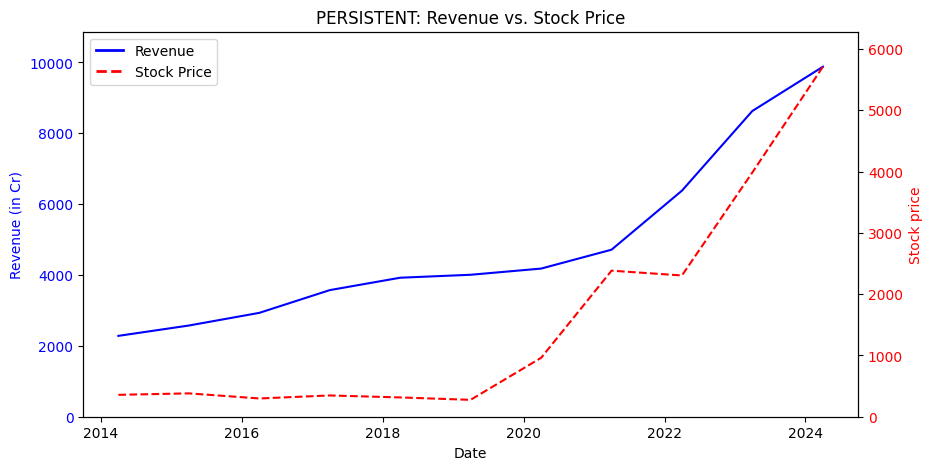

In [26]:
fig, ax1 = plt.subplots(figsize=(10, 5))

sns.lineplot(data=persistent, x="DATE ", y="REVENUE (in Cr)", ax=ax1, color="blue")
ax1.set_ylabel("Revenue (in Cr)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylim(0, persistent["REVENUE (in Cr)"].max() * 1.1)

ax2 = ax1.twinx()
sns.lineplot(data=persistent, x="DATE ", y="PERSISTENT.NS", ax=ax2, color="red",linestyle="dashed")
ax2.set_ylabel("Stock price", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.set_ylim(0, persistent["PERSISTENT.NS"].max() * 1.1)

legend_labels = [
    plt.Line2D([0], [0], color="blue", lw=2, label="Revenue"),
    plt.Line2D([0], [0], color="red", lw=2, linestyle="dashed", label="Stock Price")
]
ax1.legend(handles=legend_labels, loc="upper left")

ax1.set_xlabel("Date")
plt.title("PERSISTENT: Revenue vs. Stock Price")

Text(0.5, 1.0, 'PERSISTENT: Revenue growth rate vs. Stock Return')

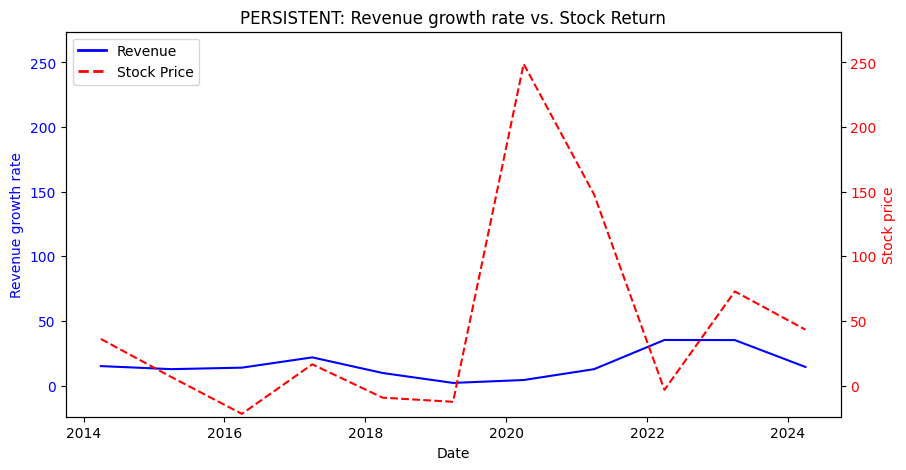

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 5))

sns.lineplot(data=persistent, x="DATE ", y="Revenue growth rate", ax=ax1, color="blue")
ax1.set_ylabel("Revenue growth rate", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
sns.lineplot(data=persistent, x="DATE ", y="PERSISTENT_Return", ax=ax2, color="red",linestyle="dashed")
ax2.set_ylabel("Stock price", color="red")
ax2.tick_params(axis="y", labelcolor="red")

min_y = min(persistent["Revenue growth rate"].min(), persistent["PERSISTENT_Return"].min()) * 1.1
max_y = max(persistent["Revenue growth rate"].max(), persistent["PERSISTENT_Return"].max()) * 1.1
ax1.set_ylim(min_y, max_y)
ax2.set_ylim(min_y, max_y)

legend_labels = [
    plt.Line2D([0], [0], color="blue", lw=2, label="Revenue"),
    plt.Line2D([0], [0], color="red", lw=2, linestyle="dashed", label="Stock Price")
]
ax1.legend(handles=legend_labels, loc="upper left")

ax1.set_xlabel("Date")
plt.title("PERSISTENT: Revenue growth rate vs. Stock Return")

Text(0.5, 1.0, 'Revenue vs. Stock Price (Regression)')

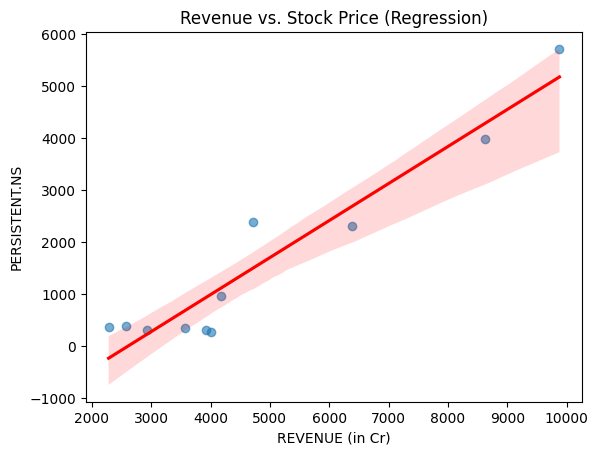

In [30]:
sns.regplot(data=persistent, x="REVENUE (in Cr)", y="PERSISTENT.NS", scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.title("Revenue vs. Stock Price (Regression)")

Text(0.5, 1.0, 'Revenue Growth Rate vs. Stock Return (Regression)')

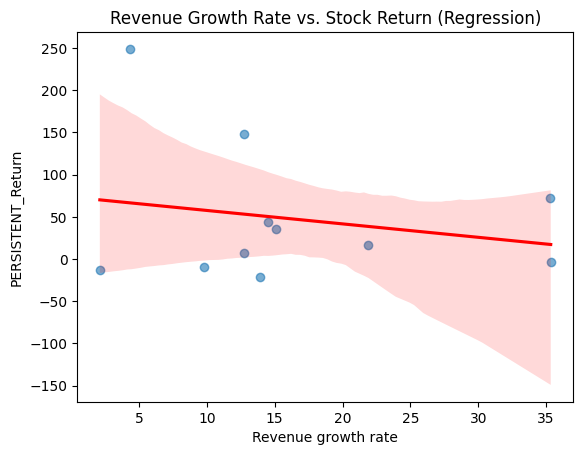

In [31]:
sns.regplot(data=persistent, x="Revenue growth rate", y="PERSISTENT_Return", scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.title("Revenue Growth Rate vs. Stock Return (Regression)")

The regression graph over 10 years, using data at the end of each year, shows a strong correlation between Persistent Systems' revenue and its stock price. However, the relationship between stock returns and revenue growth rate remains weaker.

Text(0.5, 1.0, 'Correlation Matrix of Financial Metrics')

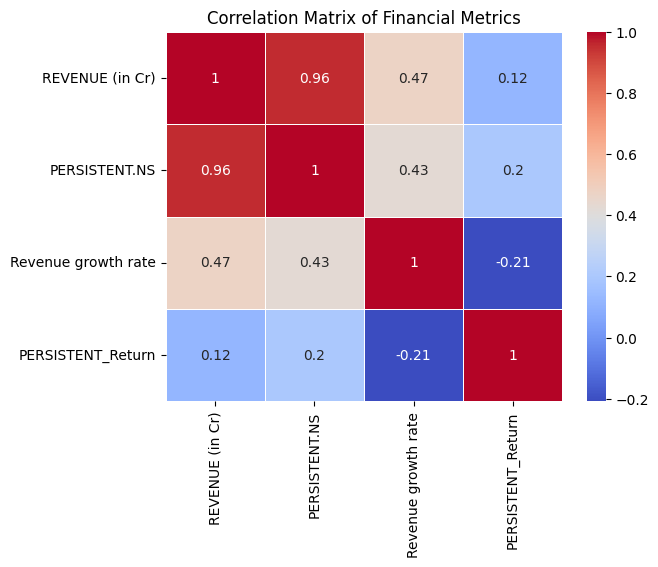

In [32]:
corr_matrix = persistent[["REVENUE (in Cr)", "PERSISTENT.NS", "Revenue growth rate", "PERSISTENT_Return"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Financial Metrics")

In [33]:
corr1 = persistent["REVENUE (in Cr)"].corr(persistent["PERSISTENT.NS"])
corr2 = persistent["Revenue growth rate"].corr(persistent["PERSISTENT_Return"])
print(f"Correlation between revenue and stock price: {corr1:.4f}")
print(f"Correlation between revenue growth rate and stock return: {corr2:.4f}")

Correlation between revenue and stock price: 0.9567
Correlation between revenue growth rate and stock return: -0.2086


The strong positive correlation of **0.9567** between **revenue and stock price** indicates that Persistent Systems' stock price closely follows its revenue trends, suggesting that investors highly value revenue growth when pricing the stock.  

On the other hand, the weak negative correlation of **-0.2086** between **revenue growth rate and stock return** suggests that short-term stock returns do not consistently align with revenue growth fluctuations. This implies that factors beyond revenue growth, such as market sentiment, broader economic conditions, or company-specific events, may have a stronger influence on stock returns.

***
***